### Roots of Parametric Polynomials

On of my recent endless scrolls to social media, I encountered beautiful 
animations from Professor Simone Conradi, showing the roots of parametric 
polynomials in the complex plane. Inspired by their beauty and giving myself an
excuse to use jax. I decided to make my on animation 

In [148]:
import jax
import jax.numpy as jnp
import os
import matplotlib.pyplot as plt
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
# @jax.jit
# def polynomial(ts,a):
#     coeffs = lambda t: jnp.array([1,jnp.abs(t)**2 -t,t**11 - abs(t)**10,0,(a*t**5 - 12j*t**2 -1),0,0,0,0,(a*t**3+5*t**2 - 1),0,0,0,0,-6*abs(t)])
#     func1=jax.vmap(lambda t,a: jnp.roots(coeffs(t,a),strip_zeros=False))
#     func2=jax.vmap(lambda a:func1(ts,a))
#     return jnp.nan_to_num(func2(a))
    

In [69]:
from jax import random

Consider the parametric polynomial

$f(x)= 100\left((i a_{2}^{3} +  i a_{2}^{2} + a_{2}  - i ) x^{5} -(i a_{1}^{3} -  i a_{1}^{2} - a_{1}  - i )\right)$

In [137]:
def polynomial_coeffs(a1,a2):
    return 100*jnp.array([1j*a2**3 + 1j*a2**2 +a2 -1j,0,0,0,0,-1j*a1**3 +1j*a1**2 +a1+1j])

def roots(a1,a2):
    coeffs = polynomial_coeffs(a1,a2)
    return jnp.roots(coeffs, strip_zeros=False)
# for quick visualizations
def random_complex(N,j=0):
        key = random.key(42+j)
        key2 = random.key(84+j)
        x=random.uniform(key, shape=(N,))
        y=random.uniform(key2, shape=(N,))
        z=x+1j*y
        return z/jnp.abs(z)
# for quick visualizations
def complex_circle(N,r=1):
        theta=jnp.linspace(-jnp.pi,jnp.pi,N)
        return r*jnp.exp(1j*theta)
@jax.jit
def run():
        z1 = complex_circle(501)
        z2 = complex_circle(501)
        fun = jax.vmap(lambda a1: jax.vmap(lambda a2: roots(a1, a2))(z2))(z1)
        return fun


In [138]:
result=run()

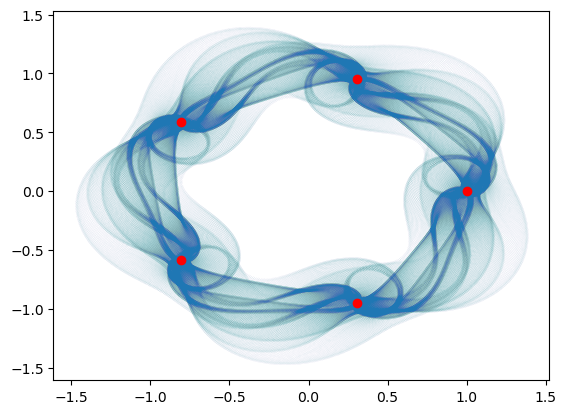

In [147]:
uno=result.squeeze()
simple=roots(1j,1j)
plt.scatter(jnp.real(uno),jnp.imag(uno),s=3e-5)
plt.scatter(jnp.real(simple),jnp.imag(simple),color="r")


In [155]:
@jax.jit
def run():
        z1 = complex_circle(501)
        z2 = complex_circle(501)
        result=jnp.zeros((501,501,5),dtype=jnp.complex64)
        for i in range(501):
            for j in range(501):
                result =result.at[i,j].set(roots(z1[i],z2[j]))
        return result

In [ ]:
ddd=run()

TODO:

- Make plot prettier
- Make another file with some fractal
